In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import torch_geometric.transforms as T
from torch_geometric.datasets import IMDB
import matplotlib.pyplot as plt

## IMDB

In [2]:
dataset = IMDB(root='./imdb_data')
data = dataset[0]
movie = data['movie'].x.tolist()
df = pd.DataFrame(movie)
df['class'] = data['movie'].y.tolist()

Feature selection from Bag-of-Words features of Movie node

In [3]:
# Feature selection for Movie class 0
class0 = df[df['class'] == 0].drop(['class'], axis=1)
class0.head()

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Feature selection for Movie class 1
class1 = df[df['class'] == 1].drop(['class'], axis=1)
class1.head()

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Feature selection for Movie class 2
class2 = df[df['class'] == 2].drop(['class'], axis=1)
class2.head()

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Features of each class of Movie node sampled using Diffusion Models

In [9]:
class_path = '../../../../graph generator/diffusion models/sampled_features_diffusion/no_dependence/discrete_diffusion/imdb/frequency/'

In [10]:
sampled0  = pd.DataFrame(torch.load(class_path + 'movie0_3066feat.pt').cpu().numpy())
sampled0.head()

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
0,0,5,0,5,5,4,1,0,4,5,...,0,0,4,0,5,1,5,5,1,0
1,0,0,4,0,5,3,4,0,5,4,...,0,0,0,0,5,4,0,5,5,5
2,0,4,0,5,2,4,5,3,0,0,...,0,2,0,1,5,0,4,0,5,4
3,0,0,3,2,4,2,0,4,4,0,...,3,4,5,5,0,0,0,0,0,5
4,5,0,0,5,5,0,0,0,2,0,...,0,5,2,0,5,0,0,0,1,0


In [11]:
sampled1  = pd.DataFrame(torch.load(class_path + 'movie1_3066feat.pt').cpu().numpy())
sampled1.head()

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
0,0,3,0,0,5,0,0,5,5,0,...,3,0,0,0,0,5,5,0,0,0
1,0,0,0,3,2,0,0,0,0,2,...,0,4,4,5,5,0,4,0,0,1
2,5,0,5,4,3,0,2,0,4,0,...,0,3,0,0,3,0,5,3,0,4
3,1,0,4,3,0,0,0,0,4,3,...,0,4,4,0,0,0,1,0,4,4
4,5,5,0,0,5,0,2,0,3,0,...,0,0,0,0,0,4,4,4,4,0


In [12]:
sampled2  = pd.DataFrame(torch.load(class_path + 'movie2_3066feat.pt').cpu().numpy())
sampled2.head()

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
0,5,4,4,0,4,0,0,0,0,0,...,5,0,5,5,4,0,3,3,5,2
1,0,0,3,0,0,3,5,0,0,1,...,0,0,0,3,0,5,0,3,5,2
2,0,4,5,4,0,3,0,2,0,0,...,1,0,2,4,0,0,5,0,0,0
3,2,4,4,0,0,4,0,0,0,0,...,0,0,2,0,0,3,2,0,0,5
4,0,1,5,0,0,0,0,0,2,0,...,2,0,0,0,0,4,0,3,2,0


In [13]:
def cosine_sim(original,sampled):
    return cosine_similarity(original, sampled)

### Pairwise cosine similarity of all features for real and synthetic distributions

Movie class 0

In [14]:
#real_class0= np.array(imp_feat0)
cosine_sim(class0,sampled0)

array([[0.03386816, 0.02994615, 0.0360093 , ..., 0.00998559, 0.02324261,
        0.02301088],
       [0.04789681, 0.02352791, 0.03240671, ..., 0.02588988, 0.01408715,
        0.03486675],
       [0.05149742, 0.02380857, 0.04391958, ..., 0.02381701, 0.02672848,
        0.00588045],
       ...,
       [0.01838094, 0.04614875, 0.03158461, ..., 0.05218664, 0.02402712,
        0.02973447],
       [0.02560192, 0.05785052, 0.01237294, ..., 0.03522584, 0.03513952,
        0.02484942],
       [0.00605852, 0.03868893, 0.03513567, ..., 0.02977127, 0.03563798,
        0.03528267]])

<AxesSubplot:>

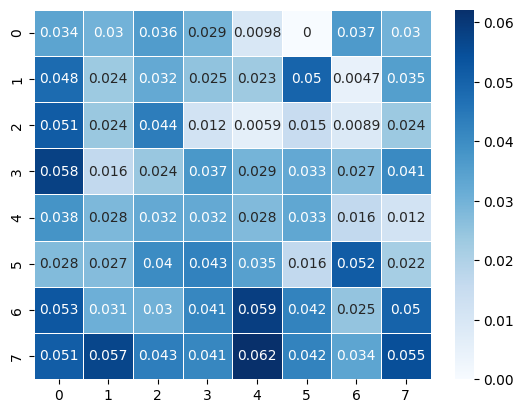

In [15]:
sns.heatmap(cosine_sim(class0[:8],sampled0[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [16]:
avg_cossim_class0 = np.mean(cosine_sim(class0,sampled0))
avg_cossim_class0

0.029494920275941427

Movie class 1

In [17]:
cosine_sim(class1,sampled1)

array([[0.05647745, 0.04415495, 0.02685471, ..., 0.03140419, 0.03992289,
        0.03305176],
       [0.        , 0.05006701, 0.05075063, ..., 0.015261  , 0.        ,
        0.0224863 ],
       [0.04121478, 0.02722789, 0.04670713, ..., 0.02766458, 0.01262473,
        0.02508452],
       ...,
       [0.01862282, 0.02433535, 0.04659441, ..., 0.02472565, 0.02716409,
        0.07286394],
       [0.04256644, 0.03515106, 0.03837186, ..., 0.03571482, 0.02716409,
        0.01619199],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

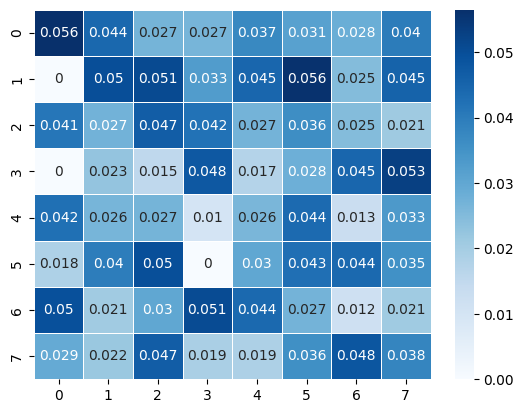

In [18]:
sns.heatmap(cosine_sim(class1[:8],sampled1[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [19]:
avg_cossim_class1 = np.mean(cosine_sim(class1,sampled1))
avg_cossim_class1

0.029586054629948982

Movie class 2

In [20]:
cosine_sim(class2,sampled2)

array([[0.04672653, 0.04741495, 0.01190613, ..., 0.02340572, 0.0148929 ,
        0.03496225],
       [0.03463178, 0.02108521, 0.03529734, ..., 0.05088559, 0.01648341,
        0.02994343],
       [0.01847028, 0.011714  , 0.03294419, ..., 0.02081683, 0.03296683,
        0.02073006],
       ...,
       [0.03700465, 0.02871458, 0.03549723, ..., 0.03925259, 0.03552163,
        0.01954449],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

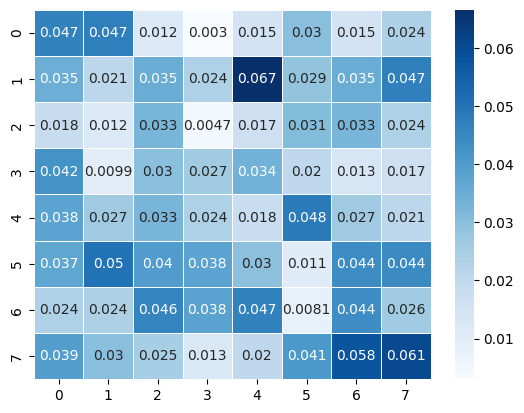

In [21]:
sns.heatmap(cosine_sim(class2[:8],sampled2[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [22]:
avg_cossim_class2 = np.mean(cosine_sim(class2,sampled2))
avg_cossim_class2

0.028588618221153203

In [23]:
(avg_cossim_class0 + avg_cossim_class1 +avg_cossim_class2)/3

0.029223197709014537